In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

# 2. chargement des donnees

In [55]:
dat= pd.read_csv('Data/DDoS_dataset.csv')
dat.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


# 3. Analyse des donnees

In [56]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [57]:
dat['src'].unique()

array(['10.0.0.1', '10.0.0.2', '10.0.0.4', '10.0.0.10', '10.0.0.3',
       '10.0.0.5', '10.0.0.13', '10.0.0.6', '10.0.0.20', '10.0.0.11',
       '10.0.0.12', '10.0.0.18', '10.0.0.8', '10.0.0.7', '10.0.0.9',
       '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17'], dtype=object)

In [58]:
dat['dst'].unique()

array(['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10',
       '10.0.0.13', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.4',
       '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12',
       '10.0.0.16', '10.0.0.17', '10.0.0.18'], dtype=object)

In [59]:
dat['Protocol'].unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [60]:
dat.drop(columns='src',inplace=True)
dat.drop(columns='dst',inplace=True)
dat.head()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


# 4.pretraitemenet

In [61]:
encoder = LabelEncoder()

In [62]:
dat['Protocol']=encoder.fit_transform(dat['Protocol'])
dat.head()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,3,3413,3665,0,0.0,0.0,0


In [63]:
dat['Protocol'].unique()

array([2, 1, 0])

In [64]:
dat.isnull().sum()

dt               0
switch           0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

<Axes: >

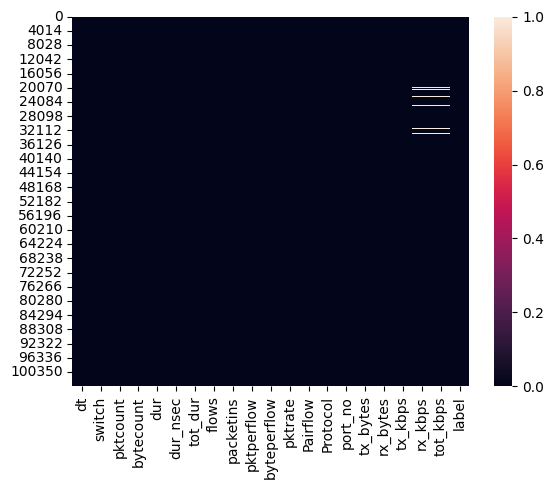

In [65]:
sns.heatmap(dat.isnull())

In [66]:
dat['rx_kbps'].fillna(dat['rx_kbps'].mean(), inplace=True)
dat['tot_kbps'].fillna(dat['tot_kbps'].mean(), inplace=True)
dat.isnull().sum()

dt             0
switch         0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [67]:
dat

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,2,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,...,0,0,0,1,15209,12720,1,1.0,2.0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,...,0,0,0,3,15099,14693,1,1.0,2.0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,...,1,0,0,2,3409,3731,0,0.0,0.0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,...,1,0,0,1,15209,12720,1,1.0,2.0,0


# 5 Diviser les donnees

In [68]:
dat.columns

Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps',
       'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [69]:
x=dat.iloc[:,:-1]
y=dat.iloc[:,-1]

In [70]:
x

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,2,3,143928631,3917,0,0.0,0.0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,2,4,3842,3520,0,0.0,0.0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,1,3795,1242,0,0.0,0.0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,2,3688,1492,0,0.0,0.0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,3,3413,3665,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,0,1,15209,12720,1,1.0,2.0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,0,3,15099,14693,1,1.0,2.0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,0,2,3409,3731,0,0.0,0.0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,0,1,15209,12720,1,1.0,2.0


In [71]:
y

0         0
1         0
2         0
3         0
4         0
         ..
104340    0
104341    0
104342    0
104343    0
104344    0
Name: label, Length: 104345, dtype: int64

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=40)

In [73]:
print("x-train:", x_train.shape)
print("x-test:", x_test.shape)
print("y-train:", y_train.shape)
print("y-train:", y_test.shape)

x-train: (80345, 20)
x-test: (24000, 20)
y-train: (80345,)
y-train: (24000,)


In [74]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [75]:
x_train

array([[-0.54480772, -0.11081502,  0.32396264, ..., -0.41171134,
        -0.4897573 , -0.63992425],
       [-1.22028515,  0.91221529,  0.78035159, ..., -0.41171134,
         2.6407063 ,  1.40873691],
       [-0.92932696,  2.9582759 , -1.01279062, ..., -0.41171134,
        -0.4897573 , -0.63992425],
       ...,
       [-0.27581968, -0.11081502,  0.63710809, ...,  1.21983352,
        -0.34337396,  0.71555934],
       [-1.26038274,  0.91221529,  0.88190396, ..., -0.41171134,
         0.74015453,  0.16496375],
       [-0.47463693, -0.11081502,  1.50449925, ..., -0.41171134,
        -0.4897573 , -0.63992425]])

In [76]:
x_test

array([[ 1.11477479,  0.40479246, -1.01175869, ..., -0.41375544,
        -0.48950877, -0.64032071],
       [ 0.58145158,  0.40479246,  3.44694886, ..., -0.26635569,
        -0.3637956 , -0.4444297 ],
       [ 0.92652836, -0.10520907, -1.01629433, ..., -0.41375544,
         0.72078861,  0.14677002],
       ...,
       [-0.48736145, -0.10520907,  0.45019139, ..., -0.41375544,
        -0.48950877, -0.64032071],
       [-0.55486017, -1.12521212, -0.32639842, ..., -0.41375544,
        -0.48950877, -0.64032071],
       [-0.52736069, -0.61521059,  1.11235673, ..., -0.41375544,
        -0.48950877, -0.64032071]])

# 6 Construire le Shallow Neural Network

In [77]:
model = Sequential()

In [78]:
model.add(Dense(10, input_shape=(20,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [79]:
history = model.fit(x_train, y_train, epochs=75, verbose=1, validation_data=(x_test, y_test))

Epoch 1/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7964 - loss: 0.4252 - val_accuracy: 0.9371 - val_loss: 0.1751
Epoch 2/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9419 - loss: 0.1558 - val_accuracy: 0.9530 - val_loss: 0.1259
Epoch 3/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9547 - loss: 0.1182 - val_accuracy: 0.9557 - val_loss: 0.1133
Epoch 4/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9589 - loss: 0.1043 - val_accuracy: 0.9597 - val_loss: 0.1050
Epoch 5/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9616 - loss: 0.0988 - val_accuracy: 0.9597 - val_loss: 0.1000
Epoch 6/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9628 - loss: 0.0933 - val_accuracy: 0.9637 - val_loss: 0.0955
Epoch 7/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9654 - loss: 0.0894 - val_accuracy: 0.9646 - val_loss: 0.0907
Epoch 8/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9674 - loss: 0.0849 - 

# 7 : Visualiser l’évolution de l’entrainement du réseau de neurone

In [80]:
history

In [81]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

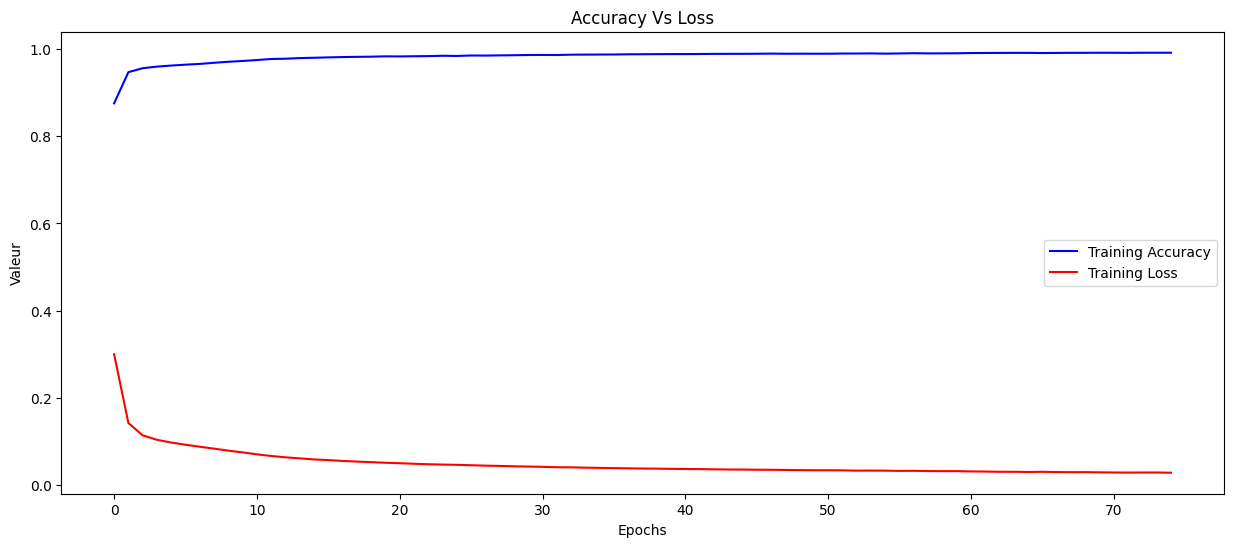

In [82]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Valeur')
plt.title('Accuracy Vs Loss')
plt.legend()
plt.plot()
plt.show()

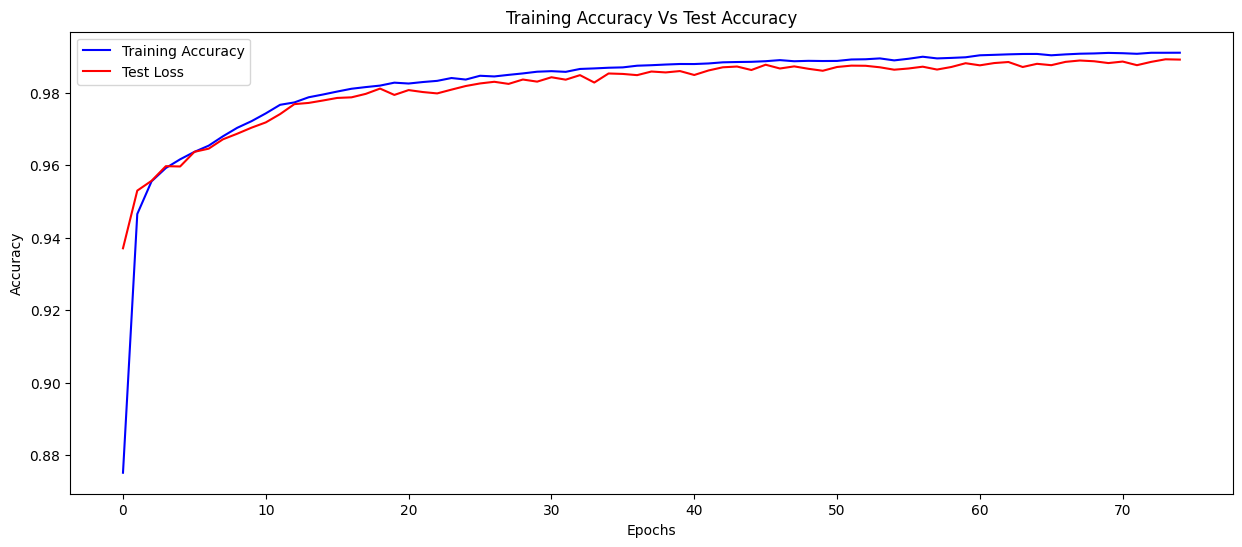

In [83]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy')
plt.legend()
plt.plot()
plt.show()

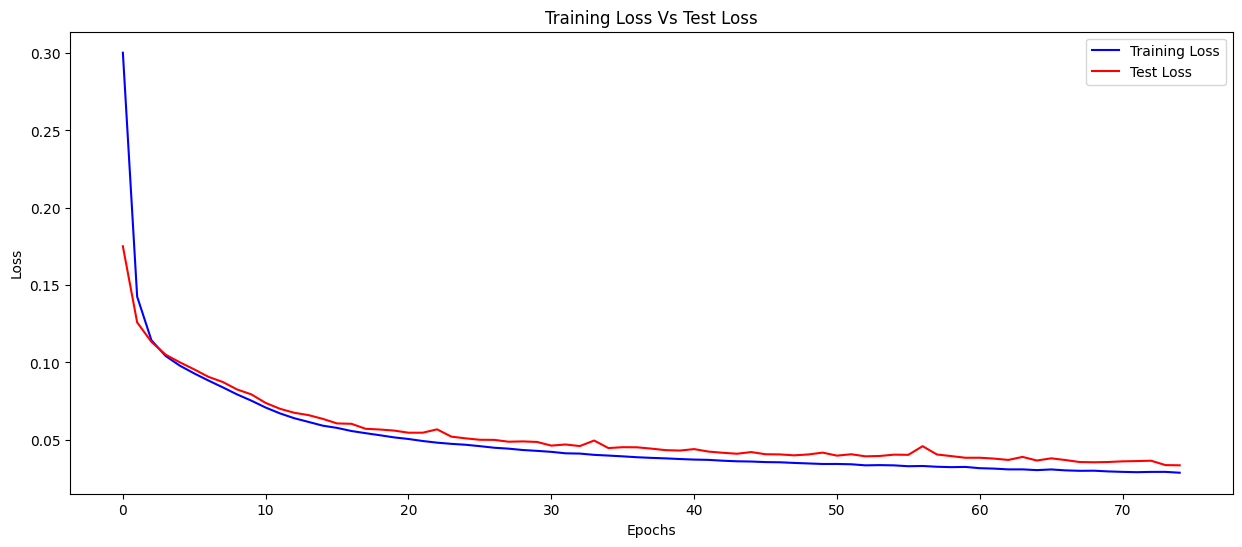

In [84]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.plot()
plt.show()

#  8 : Evaluer le modèle

In [86]:
model.evaluate(x_test, y_test)

750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.9903 - loss: 0.0301


[0.03353740647435188, 0.9891666769981384]